In [5]:
%matplotlib inline
import random
import matplotlib.pylab as plt

In [46]:
latitudes = [random.randint(-100, 100) for _ in range(5)]
longitude = [random.randint(-100, 100) for _ in range(5)]

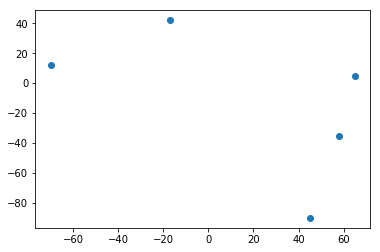

In [73]:
plt.scatter(latitudes, longitude)

In [131]:
points = [(i, j) for i, j in zip(latitudes, longitude)]
points 

[(58, -35), (-17, 42), (45, -90), (65, 5), (-70, 12)]

In [134]:
points = tuple(points)
points    

((58, -35), (-17, 42), (45, -90), (65, 5), (-70, 12))

In [135]:
import numpy as np
def dis(a, b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

##  一、暴力法

In [136]:

import itertools
print('生成排列')
all = [i for i in itertools.permutations(points[1:], len(points[1:]))]
all

生成排列


[((-17, 42), (45, -90), (65, 5), (-70, 12)),
 ((-17, 42), (45, -90), (-70, 12), (65, 5)),
 ((-17, 42), (65, 5), (45, -90), (-70, 12)),
 ((-17, 42), (65, 5), (-70, 12), (45, -90)),
 ((-17, 42), (-70, 12), (45, -90), (65, 5)),
 ((-17, 42), (-70, 12), (65, 5), (45, -90)),
 ((45, -90), (-17, 42), (65, 5), (-70, 12)),
 ((45, -90), (-17, 42), (-70, 12), (65, 5)),
 ((45, -90), (65, 5), (-17, 42), (-70, 12)),
 ((45, -90), (65, 5), (-70, 12), (-17, 42)),
 ((45, -90), (-70, 12), (-17, 42), (65, 5)),
 ((45, -90), (-70, 12), (65, 5), (-17, 42)),
 ((65, 5), (-17, 42), (45, -90), (-70, 12)),
 ((65, 5), (-17, 42), (-70, 12), (45, -90)),
 ((65, 5), (45, -90), (-17, 42), (-70, 12)),
 ((65, 5), (45, -90), (-70, 12), (-17, 42)),
 ((65, 5), (-70, 12), (-17, 42), (45, -90)),
 ((65, 5), (-70, 12), (45, -90), (-17, 42)),
 ((-70, 12), (-17, 42), (45, -90), (65, 5)),
 ((-70, 12), (-17, 42), (65, 5), (45, -90)),
 ((-70, 12), (45, -90), (-17, 42), (65, 5)),
 ((-70, 12), (45, -90), (65, 5), (-17, 42)),
 ((-70, 12

In [137]:
# 插入起始点
all_l = []
for i in all:
    a = list(i)
    a.insert(0, points[0])
    all_l.append(a)
all_l

[[(58, -35), (-17, 42), (45, -90), (65, 5), (-70, 12)],
 [(58, -35), (-17, 42), (45, -90), (-70, 12), (65, 5)],
 [(58, -35), (-17, 42), (65, 5), (45, -90), (-70, 12)],
 [(58, -35), (-17, 42), (65, 5), (-70, 12), (45, -90)],
 [(58, -35), (-17, 42), (-70, 12), (45, -90), (65, 5)],
 [(58, -35), (-17, 42), (-70, 12), (65, 5), (45, -90)],
 [(58, -35), (45, -90), (-17, 42), (65, 5), (-70, 12)],
 [(58, -35), (45, -90), (-17, 42), (-70, 12), (65, 5)],
 [(58, -35), (45, -90), (65, 5), (-17, 42), (-70, 12)],
 [(58, -35), (45, -90), (65, 5), (-70, 12), (-17, 42)],
 [(58, -35), (45, -90), (-70, 12), (-17, 42), (65, 5)],
 [(58, -35), (45, -90), (-70, 12), (65, 5), (-17, 42)],
 [(58, -35), (65, 5), (-17, 42), (45, -90), (-70, 12)],
 [(58, -35), (65, 5), (-17, 42), (-70, 12), (45, -90)],
 [(58, -35), (65, 5), (45, -90), (-17, 42), (-70, 12)],
 [(58, -35), (65, 5), (45, -90), (-70, 12), (-17, 42)],
 [(58, -35), (65, 5), (-70, 12), (-17, 42), (45, -90)],
 [(58, -35), (65, 5), (-70, 12), (45, -90), (-17

In [138]:
def get_distance(l):
    if len(l) ==0:
        return None
    distance = 0
    for i in range(len(l) - 1):
        distance += dis(l[i], l[i + 1])
    return distance
ret = sorted(all_l, key=get_distance)[0]
ret

[(58, -35), (45, -90), (65, 5), (-17, 42), (-70, 12)]

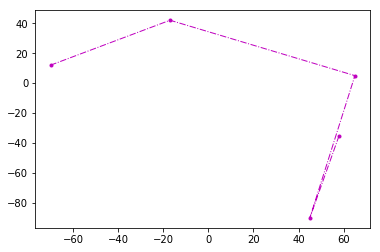

In [139]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
x = np.array([i for i,j in ret])
y = np.array([j for i,j in ret])
ax1.plot(x, y, 'm.-.', linewidth=1)

In [140]:
# 时间复杂度n!  问题：点多了就会死

## 二、动态规划法

In [191]:
from collections import defaultdict
from functools import wraps
def memo(f): 
    memo.already_computed = defaultdict(int)
    @wraps(f)
    def _wrap(arg1, arg2):
        result = None
        arg = arg1 + arg2
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg1, arg2)
            memo.already_computed[arg] = result
        
        return result
    
    return _wrap

In [195]:
solution = {}
memo.already_computed = defaultdict(int)
@memo
def r(alr, lat):
    if len(lat) == 1:
        paths = [(get_distance(alr + lat), alr + lat)]
    else:
        # 分解为 当前已经计算 和 还未计算
        paths = [(r(alr + (i,), tuple([j for j in lat if i != j])), alr + (i,)) for i in lat]
    min_dis = min(paths, key=lambda x: x[0])
    solution[min_dis[1]] = min_dis
    
    return min_dis[0]

In [196]:
r((points[0],), points[1:])

304.46058641841586

In [197]:
solution

{((58, -35), (-70, 12), (-17, 42)): (384.30125312435945,
  ((58, -35), (-70, 12), (-17, 42))),
 ((58, -35), (-70, 12), (-17, 42), (45, -90), (65, 5)): (440.17567421187431,
  ((58, -35), (-70, 12), (-17, 42), (45, -90), (65, 5))),
 ((58, -35), (-70, 12), (-17, 42), (65, 5)): (384.30125312435945,
  ((58, -35), (-70, 12), (-17, 42), (65, 5))),
 ((58, -35), (-70, 12), (-17, 42), (65, 5), (45, -90)): (384.30125312435945,
  ((58, -35), (-70, 12), (-17, 42), (65, 5), (45, -90))),
 ((58, -35), (-70, 12), (45, -90), (-17, 42), (65, 5)): (525.87005074799481,
  ((58, -35), (-70, 12), (45, -90), (-17, 42), (65, 5))),
 ((58, -35), (-70, 12), (45, -90), (65, 5)): (477.11696614965967,
  ((58, -35), (-70, 12), (45, -90), (65, 5))),
 ((58, -35), (-70, 12), (45, -90), (65, 5), (-17, 42)): (477.11696614965967,
  ((58, -35), (-70, 12), (45, -90), (65, 5), (-17, 42))),
 ((58, -35), (-70, 12), (65, 5), (-17, 42)): (507.33413747010627,
  ((58, -35), (-70, 12), (65, 5), (-17, 42))),
 ((58, -35), (-70, 12), (6

In [207]:
def parse_solution(data):
    fine = filter(lambda x: len(x[1]) == len(data), solution.values())
    return min(fine, key=lambda x : x[0])

In [208]:
parse_solution(tuple([(58, -35), (-17, 42), (45, -90), (65, 5), (-70, 12)]))

(304.46058641841586, ((58, -35), (45, -90), (65, 5), (-17, 42), (-70, 12)))

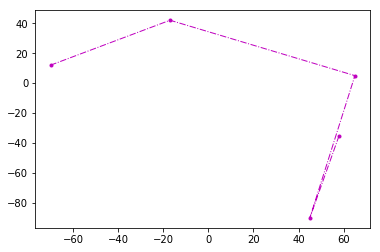

In [212]:

ret = parse_solution(tuple([(58, -35), (-17, 42), (45, -90), (65, 5), (-70, 12)]))[1]
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
x = np.array([i for i,j in ret])
y = np.array([j for i,j in ret])
ax1.plot(x, y, 'm.-.', linewidth=1)

In [213]:
## 试验更多的 点

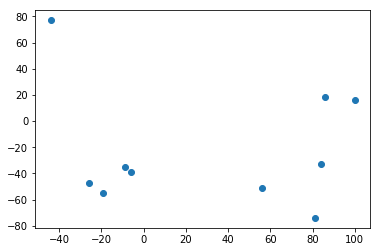

In [230]:
latitudes = [random.randint(-100, 100) for _ in range(10)]
longitude = [random.randint(-100, 100) for _ in range(10)]
plt.scatter(latitudes, longitude)

In [231]:
points = [(i, j) for i, j in zip(latitudes, longitude)]
points = tuple(points)
points

((-19, -55),
 (84, -33),
 (86, 18),
 (81, -74),
 (100, 16),
 (-44, 77),
 (-9, -35),
 (-6, -39),
 (56, -51),
 (-26, -47))

In [232]:
solution = {}
memo.already_computed = defaultdict(int)
@memo
def r(alr, lat):
    if len(lat) == 1:
        paths = [(get_distance(alr + lat), alr + lat)]
    else:
        # 分解为 当前已经计算 和 还未计算
        paths = [(r(alr + (i,), tuple([j for j in lat if i != j])), alr + (i,)) for i in lat]
    min_dis = min(paths, key=lambda x: x[0])
    solution[min_dis[1]] = min_dis
    
    return min_dis[0]

In [233]:
r((points[0],), points[1:])

383.11986783157568

In [234]:
parse_solution(points)

(383.11986783157568,
 ((-19, -55),
  (-26, -47),
  (-9, -35),
  (-6, -39),
  (56, -51),
  (81, -74),
  (84, -33),
  (100, 16),
  (86, 18),
  (-44, 77)))

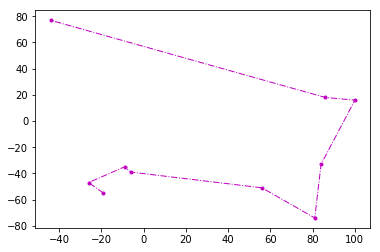

In [235]:
ret = parse_solution(points)[1]
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
x = np.array([i for i,j in ret])
y = np.array([j for i,j in ret])
ax1.plot(x, y, 'm.-.', linewidth=1)

In [225]:
# 比暴力算法 多了剪枝？